<a href="https://colab.research.google.com/github/Anubhavrajak/Hackfest2022/blob/main/water_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

In [ ]:
import pandas as pd
import numpy as np
import os
import sklearn

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir


sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
metadata=pd.read_csv('/content/drive/MyDrive/water_shufflefinal.csv')
metadata.head()

,audio,leakage
0,/content/drive/MyDrive/Water dataset/Non-Leak/...,0
1,/content/drive/MyDrive/Water dataset/Leak/1724...,1
2,/content/drive/MyDrive/Water dataset/Leak/3.1....,1
3,/content/drive/MyDrive/Water dataset/Leak/1.6....,1
4,/content/drive/MyDrive/Water dataset/Leak/003_...,1


In [ ]:
metadata.iloc[2][0]

'/content/drive/MyDrive/Water dataset/Leak/3.1.02.0345.wav'

In [ ]:
filename='/content/drive/MyDrive/Water dataset/Leak/3.1.02.0345.wav'
#/content/drive/MyDrive/Water dataset/leak/005_07573-20180826.wav


In [ ]:
ipd.Audio(filename)

In [ ]:
import wave
wav = wave.open(filename)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  8092
Total samples (frames) =  80920
Duration =  10.0


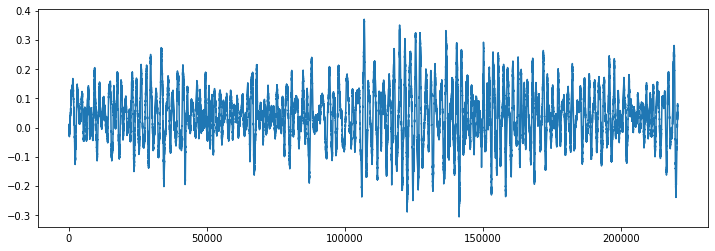

In [ ]:
audio_file_path='/content/drive/MyDrive/Water dataset/Leak/3.1.02.0345.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

**Spectral Centroid**

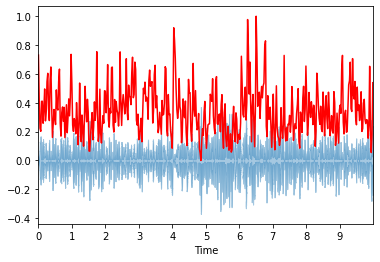

In [ ]:
x, sr = librosa.load(filename)
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

**Spectral Rolloff**:  
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy.

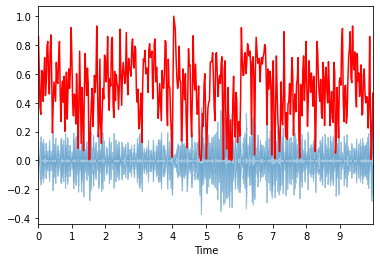

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

**MFCC — Mel-Frequency Cepstral Coefficients**   
**With Normalisation**

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    audio = sklearn.preprocessing.minmax_scale(audio, axis=0)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join((row["audio"]))
    final_class_labels=row["leakage"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])


140it [00:45,  3.07it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-419.30316, 149.10837, 80.77145, 36.636166, 3...",0
1,"[-220.10226, 180.2851, -96.54838, 37.351254, 6...",1
2,"[-314.41605, 131.49164, -15.904168, -2.5967877...",1
3,"[-273.3843, 248.39276, 1.7425551, -106.64611, ...",1
4,"[-283.01123, 274.6983, 46.8334, -71.96743, -38...",1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(140, 40)

In [ ]:
y

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-2.6365140e+02,  1.6709724e+02, -3.4641884e+01, ...,
         3.9011579e+00,  3.9415026e+00,  5.4834743e+00],
       [-2.7082205e+02,  2.4388153e+02, -4.1246152e+00, ...,
         4.0538416e+00,  9.3296537e+00,  6.5440211e+00],
       [-3.0042798e+02,  1.3766347e+02, -1.7890356e+01, ...,
         5.3233113e+00,  3.7921247e+00,  4.8467426e+00],
       ...,
       [-2.6243839e+02,  1.6906874e+02, -3.4633648e+01, ...,
         5.0468531e+00,  4.8752718e+00,  5.7423024e+00],
       [-4.1779327e+02,  8.3478409e+01,  3.2614262e+01, ...,
         2.8153560e+00,  1.3803115e+00,  1.7669614e-01],
       [-2.4762497e+02,  1.6987532e+02, -3.7661015e+01, ...,
         4.0158772e+00,  3.9375982e+00,  5.2103620e+00]], dtype=float32)

In [ ]:
y

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
X_train.shape


(112, 40)

In [ ]:
X_test.shape

(28, 40)

In [ ]:
y_train.shape

(112,)

In [ ]:
y_test.shape

(28,)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Input,Convolution1D,MaxPool1D,GlobalMaxPool1D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
input_length=40
from keras import models,optimizers,losses
import tensorflow as tf

In [ ]:
from keras.backend import batch_normalization
nclass=1
inp = Input(shape=(input_length,1))
x = Convolution1D(16, 3, activation='relu', padding="valid")(inp)
x = Convolution1D(16, 3, activation='relu', padding="valid")(x)

    

x = Convolution1D(32, 3, activation='relu', padding="valid")(x)
x = BatchNormalization()(x)

    

x = Convolution1D(64, 3, activation='relu', padding="valid")(x)
x = BatchNormalization()(x)

    
x = Convolution1D(256, 3, activation='relu', padding="valid")(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(nclass, activation='sigmoid')(x)

model = models.Model(inputs=inp, outputs=out)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])

In [ ]:
##from keras.callbacks import ModelCheckpoint, EarlyStopping
##early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
history = model.fit(X_train,y_train,batch_size=16,epochs=15,validation_data=(X_test, y_test),verbose=1)

Epoch 1/15
7/7 [==============================] - 2s 58ms/step - loss: 0.9822 - acc: 0.5536 - val_loss: 0.6730 - val_acc: 0.4643
Epoch 2/15
7/7 [==============================] - 0s 14ms/step - loss: 0.7146 - acc: 0.6696 - val_loss: 0.5672 - val_acc: 0.6429
Epoch 3/15
7/7 [==============================] - 0s 12ms/step - loss: 0.8429 - acc: 0.6161 - val_loss: 0.5629 - val_acc: 0.8214
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.6223 - acc: 0.7232 - val_loss: 0.5527 - val_acc: 0.8214
Epoch 5/15
7/7 [==============================] - 0s 13ms/step - loss: 0.5607 - acc: 0.6875 - val_loss: 0.5237 - val_acc: 0.7857
Epoch 6/15
7/7 [==============================] - 0s 15ms/step - loss: 0.4920 - acc: 0.7768 - val_loss: 0.4961 - val_acc: 0.7500
Epoch 7/15
7/7 [==============================] - 0s 13ms/step - loss: 0.4810 - acc: 0.7679 - val_loss: 0.4868 - val_acc: 0.7857
Epoch 8/15
7/7 [==============================] - 0s 15ms/step - loss: 0.4086 - acc: 0.8036 - val

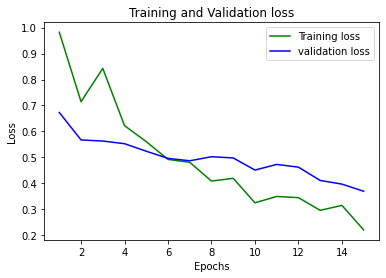

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8928571343421936


In [ ]:
X_test[1]

array([-2.4192888e+02,  1.7562297e+02, -4.2379730e+01,  2.0715287e+00,
        3.5884346e+01, -1.1021450e+01,  9.0684586e+00,  1.9896736e+01,
       -7.2645793e+00,  8.8031139e+00,  1.6891579e+01, -1.2264756e+00,
        8.2241592e+00,  1.1406113e+01,  8.1563681e-02,  9.2315741e+00,
        1.0417343e+01,  1.4023386e+00,  8.3249130e+00,  8.5221891e+00,
        2.3740041e+00,  8.0779667e+00,  7.4487667e+00,  3.2155521e+00,
        7.6446705e+00,  6.1635523e+00,  3.6019704e+00,  7.8510017e+00,
        6.2240767e+00,  3.7565160e+00,  6.0360069e+00,  4.5663557e+00,
        4.5881720e+00,  6.9670520e+00,  4.3026242e+00,  3.4721715e+00,
        5.4089470e+00,  4.3369408e+00,  4.8129888e+00,  5.2978430e+00],
      dtype=float32)

In [ ]:
predictions=model.predict(X_test)
print(predictions)

[[0.45145455]
 [0.2604251 ]
 [0.4193913 ]
 [0.275134  ]
 [0.971962  ]
 [0.6423727 ]
 [0.39097106]
 [0.5585812 ]
 [0.26968393]
 [0.94164294]
 [0.38279885]
 [0.2195379 ]
 [0.3621456 ]
 [0.27419484]
 [0.32432282]
 [0.4700383 ]
 [0.693084  ]
 [0.97582734]
 [0.9787015 ]
 [0.24741805]
 [0.80558586]
 [0.8489702 ]
 [0.9410767 ]
 [0.27882576]
 [0.5892112 ]
 [0.9565207 ]
 [0.24405964]
 [0.37580487]]


In [ ]:
predictions[np.where(predictions>0.5)]=1
predictions[np.where(predictions<0.5)]=0

In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 2.9 MB 11.7 MB/s 
     |████████████████████████████████| 212 kB 52.9 MB/s 
     |████████████████████████████████| 1.1 MB 47.5 MB/s 
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 253 kB 51.1 MB/s 
     |████████████████████████████████| 2.0 MB 45.6 MB/s 
     |████████████████████████████████| 144 kB 52.9 MB/s 
     |████████████████████████████████| 271 kB 50.8 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 10.9 MB 46.3 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 856 kB 43.2 MB/s 
     |████████████████████████████████| 62 kB 780 kB/s 
     |███████████████████████

In [ ]:
import random

import pandas as pd

import gradio as gr

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
def leak_detector(leak, categories, sensitivity):
    activity_range = random.randint(0, 100)
    drop_columns = [
        column for column in ["0", "1", "other"] if column not in categories
    ]
    if len(drop_columns):
        leak.drop(columns=drop_columns, inplace=True)
    return (
        leak,
        leak,
        {"leak": activity_range / 100.0, "not leak": 1 - activity_range / 100.0},
    )

In [ ]:
iface = gr.Interface(
    leak_detector,
    [
        gr.inputs.Timeseries(x="time", y=["0", "1", "other"]),
        gr.inputs.CheckboxGroup(
            ["0", "1", "other"], default=["0", "1", "other"]
        ),
        gr.inputs.Slider(1, 3),
    ],
    [
        "dataframe",
        gr.outputs.Timeseries(x="time", y=["0", "1", "other"]),
        gr.outputs.Label(label="leak Level"),
    ],
)
iface.launch()